In [1]:
'''
NCAA Project
Look at the difference between winning and losing teams in the NCAAM tournament, 
using stats of every NCAAM tournament game since 2003.
Rashad Alston
General Basketball Analysis Repo >> https://github.com/ralston3/basketball
'''

'\nNCAA Project\nLook at the difference between winning and losing teams in the NCAAM tournament, \nusing stats of every NCAAM tournament game since 2003.\nRashad Alston\nGeneral Basketball Analysis Repo >> https://github.com/ralston3/basketball\n'

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns ; sns.set()
%matplotlib inline

In [3]:
# Only using the Teams, and Detailed Tournament Results files

tourney_df = pd.read_csv('data/TourneyDetailedResults.csv')
teams_df = pd.read_csv('data/Teams.csv')
seasonsCR_df = pd.read_csv('data/RegularSeasonCompactResults.csv')
team_dict = dict(zip(teams_df['Team_Id'].values, teams_df['Team_Name'].values))
tourney_df['Wteam_name'] = tourney_df['Wteam'].map(team_dict)
tourney_df['Lteam_name'] = tourney_df['Lteam'].map(team_dict)

print('================================================')
print('Tournament data:')
print('================================================')
print(tourney_df.head(10))
print('================================================')
print('Teams data:')
print('================================================')
print(teams_df.head(10))
print('================================================')
print('Season data:')
print('================================================')
print(seasonsCR_df.head(10))


Tournament data:
   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
0    2003     134   1421      92   1411      84    N      1    32    69   
1    2003     136   1112      80   1436      51    N      0    31    66   
2    2003     136   1113      84   1272      71    N      0    31    59   
3    2003     136   1141      79   1166      73    N      0    29    53   
4    2003     136   1143      76   1301      74    N      1    27    64   
5    2003     136   1163      58   1140      53    N      0    17    52   
6    2003     136   1181      67   1161      57    N      0    19    54   
7    2003     136   1211      74   1153      69    N      0    20    47   
8    2003     136   1228      65   1443      60    N      0    24    56   
9    2003     136   1242      64   1429      61    N      0    28    51   

      ...       Lfta  Lor  Ldr  Last  Lto  Lstl  Lblk  Lpf     Wteam_name  \
0     ...         31   17   28    16   15     5     0   22  UNC Asheville   
1  

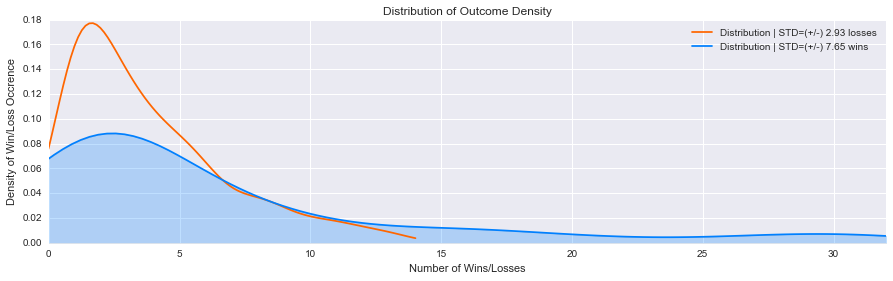

In [4]:
# Distribution density of wins and losses.

tourney_wins = tourney_df.loc[tourney_df['Wteam'] !=0, 'Wteam'].value_counts()
tourney_losses = tourney_df.loc[tourney_df['Wteam'] !=0, 'Lteam'].value_counts()
tourney_df['Wwins'] = tourney_df['Wteam'].map(tourney_wins)
tourney_df['Lwins'] = tourney_df['Lteam'].map(tourney_wins)
tourney_df = tourney_df.replace(np.nan, 0)

plt.figure(figsize=(15, 4))

sns.kdeplot(tourney_losses, color='#ff6600', label='Distribution | STD=(+/-) %3.2f losses'%(np.std(tourney_losses)))
sns.kdeplot(tourney_wins, shade='True', color ='#0080ff', label='Distribution | STD=(+/-) %3.2f wins'%(np.std(tourney_wins)))

plt.title('Distribution of Outcome Density')
plt.xlabel('Number of Wins/Losses')
plt.ylabel('Density of Win/Loss Occrence')
plt.xlim([0, max(tourney_wins)])
plt.legend(loc='upper right')

In [5]:
season_wins = seasonsCR_df.loc[(seasonsCR_df['Season'] == 2015) & (seasonsCR_df['Wteam'] !=0), 'Wteam'].value_counts()

In [6]:
print(season_wins[1214])

16


In [7]:
tourney2015 = tourney_df[(tourney_df['Season'] == 2015)]
tourney2015.loc[780, 'Wteam'] = 3
print(tourney_df.loc[[780]])
print(tourney2015.loc[[780]])

     Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
780    2015     134   1214      74   1264      64    N      0    26    53   

     ...    Ldr  Last  Lto  Lstl  Lblk  Lpf  Wteam_name  Lteam_name  Wwins  \
780  ...     27    15   17     5     3   25     Hampton   Manhattan      1   

     Lwins  
780      1  

[1 rows x 38 columns]
     Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
780    2015     134      3      74   1264      64    N      0    26    53   

     ...    Ldr  Last  Lto  Lstl  Lblk  Lpf  Wteam_name  Lteam_name  Wwins  \
780  ...     27    15   17     5     3   25     Hampton   Manhattan      1   

     Lwins  
780      1  

[1 rows x 38 columns]


/Users/dtamayo/miniconda2/envs/ml/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
tourney2015 = tourney_df[(tourney_df['Season'] == 2015)]
season_wins = seasonsCR_df.loc[(seasonsCR_df['Season'] == 2015) & (seasonsCR_df['Wteam'] !=0), 'Wteam'].value_counts()
tourney2015['Wwins'] = tourney2015['Wteam'].map(season_wins)
tourney2015['Lwins'] = tourney2015['Lteam'].map(season_wins)
tourney2015 = tourney2015.replace(np.nan, 0)
d = {'Wwins':tourney2015['Wwins'], 'Lwins':tourney2015['Lwins']}
df = pd.DataFrame(data=d)
df.head(10)

/Users/dtamayo/miniconda2/envs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dtamayo/miniconda2/envs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Lwins,Wwins
780,19,16
781,23,20
782,23,25
783,20,19
784,22,31
785,26,26
786,20,22
787,21,22
788,23,21
789,23,23


In [9]:
rands = np.random.randint(2,size=df.shape[0])
randscomp = 1-rands

In [14]:
x = [df.iloc[i,rands[i]] for i in range(df.shape[0])]
y = [df.iloc[i,randscomp[i]] for i in range(df.shape[0])]
print(x[6:10])
print(y[6:10])
print(rands[6:10])
d2 = {'wins1':x, 'wins2':y, 'Winner':randscomp}
df2 = pd.DataFrame(data=d2)
print(df2.head())

[20, 22, 21, 23]
[22, 21, 23, 23]
[0 1 1 1]
   Winner  wins1  wins2
0       1     19     16
1       0     20     23
2       0     25     23
3       0     19     20
4       1     22     31


In [23]:
X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [30]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.481481481481
